# Esperanza's Data Re-cleaning Notebook

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import prophet as Prophet

Importing plotly failed. Interactive plots will not work.


In [ ]:
# Prophet import gives: "Importing plotly failed. Interactive plots will not work."
# Imported everything for Jupyter Notebook and plotly to cooperate but it still isn't

## Grabbing Data from Data/Out

In [2]:
# this path is based on my workflow with virtual environment - path will need to be changed

#floor_data = pd.read_csv('Capstone-Brick-Modeling/data/temp/combined_floors.csv')

In [2]:
#col_list = ['time', 'Common Setpoint', 'Actual Sup Flow SP', 'Zone Temperature', 'Actual Supply Flow', 'Outside Air Temp', 'Humidity', 'energy']

floor_2 = pd.read_csv('Capstone-Brick-Modeling/data/raw/merged_all_2F.csv', index_col = 'Unnamed: 0')
floor_3 = pd.read_csv('Capstone-Brick-Modeling/data/raw/merged_all_3F.csv', index_col = 'Unnamed: 0')
floor_4 = pd.read_csv('Capstone-Brick-Modeling/data/raw/merged_all_4F.csv', index_col = 'Unnamed: 0')

In [3]:
# one version of this is Unnamed: 0.2 but I'm not sure why this one says 

floor_2 = floor_2.drop(['Unnamed: 0.1.1'], axis = 1)

In [4]:
floor_2.head(5)

,Unnamed: 0.1,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next
0,0,2018-01-03T20:57:39+00:00,72.5,330.0,75.2,318.73,10.109642,68.44,56.0,75.2,317.06,68.50,56.0,10.113301
1,1,2018-01-03T21:04:13+00:00,72.5,330.0,75.2,317.06,10.113301,68.50,56.0,75.7,314.34,68.25,56.0,10.099466
2,2,2018-01-03T21:10:44+00:00,72.5,330.0,75.7,314.34,10.099466,68.25,56.0,75.7,313.91,68.31,56.0,10.241028
3,3,2018-01-03T21:17:16+00:00,72.5,330.0,75.7,313.91,10.241028,68.31,56.0,75.7,318.31,68.44,57.0,10.187620
4,4,2018-01-03T21:23:44+00:00,72.5,330.0,75.7,318.31,10.187620,68.44,57.0,75.7,316.65,68.81,57.0,10.194055


In [5]:
floor_2['time_transformed'] = pd.to_datetime(floor_2['time'])
floor_2['time_floored'] = floor_2['time_transformed'].transform(lambda x: x.floor(freq='30T'))
#floor_2['time_floored_5min'] = floor_2['time_transformed'].transform(lambda x: x.floor(freq='5T'))
#floor_2['unix_floored_5min'] = floor_2['time_floored_5min'].view('int64')

In [29]:
#floor_3 = floor_3.drop(['Unnamed: 0.1'], axis = 1)

In [6]:
floor_3.head(5)

,Unnamed: 0.1,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next
0,0,2018-07-05T00:58:48+00:00,72.0,295.0,73.75,287.56,9.067059,68.88,53.0,73.75,289.97,69.31,53.0,9.104582
1,1,2018-07-05T01:04:13+00:00,72.0,295.0,73.75,289.97,9.104582,69.31,53.0,73.75,291.17,68.88,53.0,9.377247
2,2,2018-07-05T01:09:37+00:00,72.0,295.0,73.75,291.17,9.377247,68.88,53.0,73.75,299.89,68.94,53.0,9.147068
3,3,2018-07-05T01:15:17+00:00,72.0,295.0,73.75,299.89,9.147068,68.94,53.0,73.75,294.97,69.13,53.0,9.198235
4,4,2018-07-05T01:20:55+00:00,72.0,295.0,73.75,294.97,9.198235,69.13,53.0,73.75,296.62,68.94,53.0,9.212810


In [7]:
floor_3['time_transformed'] = pd.to_datetime(floor_3['time'])
floor_3['time_floored'] = floor_3['time_transformed'].transform(lambda x: x.floor(freq='30T'))

#floor_3['time_floored_5min'] = floor_3['time_transformed'].transform(lambda x: x.floor(freq='5T'))
#floor_3['unix_floored_5min'] = floor_3['time_floored_5min'].view('int64')

In [36]:
#floor_4 = floor_4.drop(['Unnamed: 0.1'], axis = 1)

In [8]:
floor_4.head(5)

,Unnamed: 0.1,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next
0,0,2018-09-23T22:59:39+00:00,72.0,722.73,75.25,733.46,23.554224,71.31,53.0,74.74,692.03,71.19,53.0,22.261861
1,1,2018-09-23T23:06:38+00:00,72.0,661.39,74.74,692.03,22.261861,71.19,53.0,74.74,654.06,71.19,53.0,19.471076
2,2,2018-09-23T23:13:38+00:00,72.0,624.95,74.74,654.06,19.471076,71.19,53.0,74.24,576.94,70.94,53.0,18.861571
3,3,2018-09-23T23:20:38+00:00,72.0,562.05,74.24,576.94,18.861571,70.94,53.0,74.24,558.88,70.94,53.0,17.087055
4,4,2018-09-23T23:27:37+00:00,72.0,532.93,74.24,558.88,17.087055,70.94,53.0,74.24,506.30,70.81,53.0,16.212959


In [9]:
floor_4['time_transformed'] = pd.to_datetime(floor_4['time'])
floor_4['time_floored'] = floor_4['time_transformed'].transform(lambda x: x.floor(freq='30T'))

#floor_4['time_floored_5min'] = floor_4['time_transformed'].transform(lambda x: x.floor(freq='5T'))
#floor_4['unix_floored_5min'] = floor_4['time_floored_5min'].view('int64')

In [10]:
floor_2['floor'] = 2
floor_3['floor'] = 3
floor_4['floor'] = 4

In [11]:
grouped_df = pd.concat([floor_2, floor_3, floor_4])

In [12]:
grouped_df_counts = grouped_df.groupby(['time_floored', 'Unnamed: 0.1'])['Common Setpoint'].count().rename("count")

In [14]:
grouped_df_counts.max()

9

In [15]:
grouped_df_counts.min()

1

In [27]:
grouped_df_means = grouped_df.groupby(['time_floored', 'Unnamed: 0.1']).mean()
grouped_df_means.columns += ["_mean"]

In [28]:
grouped_df_sums = grouped_df.groupby(['time_floored', 'Unnamed: 0.1']).sum()
grouped_df_sums.columns += ["_sum"]

In [29]:
counts_sums = grouped_df_sums.merge(grouped_df_counts.to_frame(), left_index = True, right_index = True, how = 'outer')

In [30]:
counts_sums = counts_sums.drop(['floor_sum'], axis = 1)

In [49]:
count_factors = (9 / counts_sums['count'])

In [35]:
counts_sums['factor'] = count_factors

In [39]:
counts_sums.head()

Common Setpoint_sum  \
time_floored              Unnamed: 0.1                        
2017-07-07 13:30:00+00:00 0                           433.0   
                          1                           433.0   
                          2                           433.0   
                          3                           433.0   
2017-07-07 14:00:00+00:00 4                           433.0   

                                        Actual Sup Flow SP_sum  \
time_floored              Unnamed: 0.1                           
2017-07-07 13:30:00+00:00 0                             939.75   
                          1                             933.75   
                          2                             938.23   
                          3                             929.33   
2017-07-07 14:00:00+00:00 4                            2068.26   

                                        Zone Temperature_sum  \
time_floored              Unnamed: 0.1                         
2017-07-07 13:30:00+00:00 0                           450.00   
                          1                           450.00   
                          2                           450.00   
                          3                           450.00   
2017-07-07 14:00:00+00:00 4                           451.01   

                                        Actual Supply Flow_sum  energy_sum  \
time_floored              Unnamed: 0.1                                       
2017-07-07 13:30:00+00:00 0                            1014.17   34.584364   
                          1                            1056.67   37.240799   
                          2                            1135.43   35.773216   
                          3                            1082.10   58.669832   
2017-07-07 14:00:00+00:00 4                            1737.34   71.164954   

                                        Outside Air Temp_sum  Humidity_sum  \
time_floored              Unnamed: 0.1                                       
2017-07-07 13:30:00+00:00 0                           407.64         378.0   
                          1                           408.00         378.0   
                          2                           410.64         378.0   
                          3                           411.78         378.0   
2017-07-07 14:00:00+00:00 4                           413.64         378.0   

                                        Zone Temperature Next_sum  \
time_floored              Unnamed: 0.1                              
2017-07-07 13:30:00+00:00 0                                450.00   
                          1                                450.00   
                          2                                450.00   
                          3                                451.01   
2017-07-07 14:00:00+00:00 4                                448.86   

                                        Actual Supply Flow Next_sum  \
time_floored              Unnamed: 0.1                                
2017-07-07 13:30:00+00:00 0                                 1056.67   
                          1                                 1135.43   
                          2                                 1082.10   
                          3                                 1737.34   
2017-07-07 14:00:00+00:00 4                                 2094.78   

                                        Outside Air Temp Next_sum  \
time_floored              Unnamed: 0.1                              
2017-07-07 13:30:00+00:00 0                                408.00   
                          1                                410.64   
                          2                                411.78   
                          3                                413.64   
2017-07-07 14:00:00+00:00 4                                417.00   

                                        Humidity Next_sum  energy Next_sum  \
time_floored              Unnamed: 0.1          

In [43]:
count_factors.head().to_frame()

count
time_floored              Unnamed: 0.1          
2017-07-07 13:30:00+00:00 0             0.666667
                          1             0.666667
                          2             0.666667
                          3             0.666667
2017-07-07 14:00:00+00:00 4             0.666667

In [52]:
count_sums_mod = counts_sums.multiply(count_factors, axis = 'index')

In [54]:
count_sums_mod['count'].value_counts()

9.0    128799
Name: count, dtype: int64

In [56]:
count_sums_mod.head(5)

Common Setpoint_sum  \
time_floored              Unnamed: 0.1                        
2017-07-07 13:30:00+00:00 0                           649.5   
                          1                           649.5   
                          2                           649.5   
                          3                           649.5   
2017-07-07 14:00:00+00:00 4                           649.5   

                                        Actual Sup Flow SP_sum  \
time_floored              Unnamed: 0.1                           
2017-07-07 13:30:00+00:00 0                           1409.625   
                          1                           1400.625   
                          2                           1407.345   
                          3                           1393.995   
2017-07-07 14:00:00+00:00 4                           3102.390   

                                        Zone Temperature_sum  \
time_floored              Unnamed: 0.1                         
2017-07-07 13:30:00+00:00 0                          675.000   
                          1                          675.000   
                          2                          675.000   
                          3                          675.000   
2017-07-07 14:00:00+00:00 4                          676.515   

                                        Actual Supply Flow_sum  energy_sum  \
time_floored              Unnamed: 0.1                                       
2017-07-07 13:30:00+00:00 0                           1521.255   51.876546   
                          1                           1585.005   55.861199   
                          2                           1703.145   53.659825   
                          3                           1623.150   88.004748   
2017-07-07 14:00:00+00:00 4                           2606.010  106.747430   

                                        Outside Air Temp_sum  Humidity_sum  \
time_floored              Unnamed: 0.1                                       
2017-07-07 13:30:00+00:00 0                           611.46         567.0   
                          1                           612.00         567.0   
                          2                           615.96         567.0   
                          3                           617.67         567.0   
2017-07-07 14:00:00+00:00 4                           620.46         567.0   

                                        Zone Temperature Next_sum  \
time_floored              Unnamed: 0.1                              
2017-07-07 13:30:00+00:00 0                               675.000   
                          1                               675.000   
                          2                               675.000   
                          3                               676.515   
2017-07-07 14:00:00+00:00 4                               673.290   

                                        Actual Supply Flow Next_sum  \
time_floored              Unnamed: 0.1                                
2017-07-07 13:30:00+00:00 0                                1585.005   
                          1                                1703.145   
                          2                                1623.150   
                          3                                2606.010   
2017-07-07 14:00:00+00:00 4                                3142.170   

                                        Outside Air Temp Next_sum  \
time_floored              Unnamed: 0.1                              
2017-07-07 13:30:00+00:00 0                                612.00   
                          1                                615.96   
                          2                                617.67   
                          3                                620.46   
2017-07-07 14:00:00+00:00 4                                625.50   

                                        Humidity Next_sum  energy Next_sum  \
time_floored              Unnamed: 0.1          

In [ ]:
# for these, does it make sense ot do a division for the other values and use averages, use some combination of both or what


# or should I impute differently? 

# talk about it with group tomorrow
# also in effect seems to be little/no difference between using 5 minute and 30 minutes based on shape, so I feel more comfortable with larger interval

In [87]:
diff_ind = pd.date_range('2017-07-07 13:30:00+0000', '2019-01-07 23:30:00+0000', freq="30T").difference(count_sums_mod.index.get_level_values(0))

In [88]:
len(diff_ind)

9523

In [89]:
diff_ind[0:5]

DatetimeIndex(['2017-07-08 17:00:00+00:00', '2017-07-08 17:30:00+00:00',
               '2017-07-08 18:00:00+00:00', '2017-07-08 18:30:00+00:00',
               '2017-07-08 19:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [90]:
# According to this - if we follow this path, there are about 9523 missing values in the index

<AxesSubplot:>

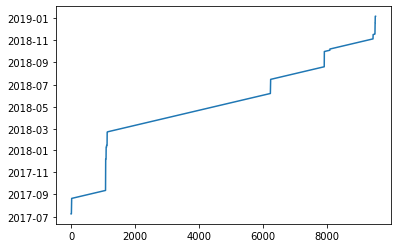

In [91]:
pd.Series(diff_ind).plot()

In [ ]:
# anotehr way of showing us visualziation we already knew - lots of missings at certain stretches (mainly late 2017 to earliy 2018), little everywhere else

In [ ]:
# how should we handle time and do we want to try to impute values between or what?

### Earlier Code Version - not using

floor_2_sums = floor_2.groupby(['time_floored', 'Unnamed: 0.1']).sum()
floor_2_sums.columns += ['_sum']

floor_3_sums = floor_3.groupby(['time_floored', 'Unnamed: 0.1']).sum()
floor_3_sums.columns += ['_sum']

floor_4_sums = floor_4.groupby(['time_floored', 'Unnamed: 0.1']).sum()
floor_4_sums.columns += ['_sum']

floor_2_means = floor_2.groupby(['time_floored_5min', 'Unnamed: 0.1']).mean()
floor_2_means.columns += ['_mean']

floor_3_means = floor_3.groupby(['time_floored_5min', 'Unnamed: 0.1']).mean()
floor_3_means.columns += ['_mean']

floor_4_means = floor_4.groupby(['time_floored_5min', 'Unnamed: 0.1']).mean()
floor_4_means.columns += ['_mean']